In [76]:
#NEW DOCUMNET USE THIS NOT THE OTHER ONE 

In [77]:
#importing
from astropy.table import Table, join, unique, QTable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter
%matplotlib inline 

In [78]:
#reading files using Table.read function in astropy.table
data_summary_6866 = Table.read("/users/EllaMathews/Research/summary_ngc6866.csv")
data_gaia_6866 = Table.read("/users/EllaMathews/Research/summary_ngc6866_xmatch_gaiadr3.csv")
data_kic_6866_all = Table.read("/users/EllaMathews/Research/summary_ngc6866_xmatch_kic.csv")
data_kic_6866 = data_kic_6866_all['id', 'KIC'] #only need kic and ids not the other columns

In [79]:
data_gaia_6866

angDist,id,ra(hr),ra(deg),dec(deg),DR3Name,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,SolID,Source,RandomI,e_RAdeg,e_DEdeg,Plx,e_Plx,RPlx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,NAL,NAC,NgAL,NbAL,gofAL,chi2AL,epsi,sepsi,Solved,APF,nueff,pscol,e_pscol,RApscolCorr,DEpscolCorr,PlxpscolCorr,pmRApscolCorr,pmDEpscolCorr,MatchObsA,Nper,amax,MatchObs,IPDgofha,IPDgofhp,IPDfmp,IPDfow,RUWE,Dup,o_Gmag,FG,e_FG,RFG,Gmag,e_Gmag,o_BPmag,FBP,e_FBP,RFBP,BPmag,e_BPmag,o_RPmag,FRP,e_FRP,RFRP,RPmag,e_RPmag,E(BP/RP),NBPcont,NBPblend,NRPcont,NRPblend,Mode,BP-RP,BP-G,G-RP,RV,e_RV,n_RV,o_RV,o_RVd,RVNper,RVS/N,RVgof,RVchi2,RVTdur,RVamp,RVtempTeff,RVtemplogg,RVtemp[Fe/H],Vatmparam,vbroad,e_Vbroad,o_Vbroad,GRVSmag,e_GRVSmag,o_GRVSmag,RVSS/N,VarFlag,PQSO,PGal,PSS,Teff,b_Teff,B_Teff,logg,b_logg,B_logg,[Fe/H],b_[Fe/H],B_[Fe/H],Dist,b_Dist,B_Dist,A0,b_A0,B_A0,AG,b_AG,B_AG,E(BP-RP),b_E(BP-RP),B_E(BP-RP),Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000
float64,int64,float64,float64,float64,str28,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,float64,float64,float64,float64,float64
0.169112,460220237,20.014202,300.21303,44.254009,Gaia DR3 2076124557392530048,300.21301051721,44.2539641449,0.0,0.0,121,1636148068921376768,2076124557392530048,1308232500,0.0166,0.0164,1.0239,0.0186,55.1366,10.565,-5.384,0.023,-9.09,0.021,-0.0216,-0.0651,-0.1153,-0.0975,0.2048,-0.1314,-0.1282,-0.1657,0.0072,-0.0366,383,0,383,0,-1.3869,352.68,0.0,0.0,31,0,1.509,--,--,--,--,--,--,--,44,27,0.03213,48,0.01518,30.6,0,0,0.949,0,384,19860.08167,6.25972,3172.68,14.942414,0.002776,45,9706.72,16.9027,574.271,15.370861,0.00337,46,14504.6,15.847,915.291,14.344129,0.003961,1.219,0,3,0,2,0,1.026732,0.428447,0.598286,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,VARIABLE,0.0,0.0,0.999949,5333.7,5304.7,5359.1,4.3688,4.3583,4.3794,-0.3545,-0.3875,-0.3252,920.4753,906.4548,935.8802,0.2577,0.2373,0.2749,0.2101,0.1933,0.2243,0.1127,0.1037,0.1203,MARCS,300.21304392649,44.25400454384,0.370513,0.342233,-0.0256
2.356063,460220237,20.014202,300.21303,44.254009,Gaia DR3 2076124557393816576,300.21214422367,44.25416964701,0.0,0.0,69,1636148068921376768,2076124557393816576,961855238,0.4699,0.4337,0.6672,0.5114,1.3046,3.655,3.311,0.612,-1.548,0.57,0.0706,-0.1408,-0.1733,-0.064,0.1557,-0.0474,-0.1311,-0.1413,0.1853,0.0715,302,0,300,2,1.0112,358.86,1.773,1.645,95,0,--,1.1538,0.1447,0.02,0.157,-0.069,0.069,-0.157,35,23,0.864948,39,0.05133,13.79,0,2,1.041,0,308,136.47757,1.35244,100.912,20.349714,0.011106,8,222.395,36.9556,6.0179,19.47073,0.180439,9,381.712,36.1807,10.5502,18.293556,0.102981,4.426,0,0,0,0,0,1.177174,-0.878984,2.056158,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NOT_AVAILABLE,5e-06,0.000153,0.99984,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,300.21212367706,44.25417652884,9.884268,9.192568,0.0757
0.169112,460220237,20.014202,300.21303,44.254009,Gaia DR3 2076124557392530048,300.21301051721,44.2539641449,0.0,0.0,121,163614806892137676

In [80]:
check = unique(data_kic_6866, keys = 'id')
print(len(check))

2874


In [81]:
values, counts = np.unique(check['KIC'], return_counts = True)

In [82]:
len(np.where(counts > 1)[0])

0

In [83]:
#isolating the columns from gaia that is needed in the output table
data_gaia_6866.sort(keys = 'angDist')
data_gaia_6866_columnsneeded = unique(data_gaia_6866['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'],keys='id')
data_gaia_6866_columnsneeded.sort(keys = ['id', 'angDist'])
data_gaia_6866_columnsneeded2 = unique(data_gaia_6866_columnsneeded['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'], keys = 'DR3Name')

In [84]:
#using join function to merge data files 
combined_table = join(data_summary_6866, data_gaia_6866_columnsneeded2, keys='id', join_type ='right')
combined_table_wantedcolumns= combined_table['angDist', 'date', 'fwhm', 'id', 'hjd', 'ra', 'dec','v', 'bv', 'teff', 'feh', 'feh_err', 'logg', 'logg_err', 'rv', 'rve','vsini', 'vsini_err','RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name']

In [85]:
#using join function to merge KIC data

In [86]:
combined_table_all = join(combined_table_wantedcolumns, unique(data_kic_6866, keys = 'id'), 
                          keys =['id'], join_type='left')

In [87]:
len(data_kic_6866),len(data_summary_6866),len(combined_table),len(combined_table_wantedcolumns),len(combined_table_all)

(5568, 4586, 4586, 4586, 4586)

In [88]:
x = unique(combined_table_all)
print(len(x))

4586


In [89]:
combined_table_all.write('Combined_Data_6866.csv', format = 'csv', overwrite = True)

In [90]:
#checking to see if sort actually sorted 
#print(combined_table_wanted)

In [91]:
#using unique function to get the first instance of each id 
unique_ids = unique(data_gaia_6866, keys = 'id')
unique_ids.sort(keys = ['id', 'angDist'])
unique_ids2 = unique(unique_ids, keys = 'DR3Name')


In [92]:
#checking to see if it worked 
#print(unique_ids2)

In [93]:
#using numpy unique function to get the values of the unique ids and how many times they appear 
values, counts = np.unique(unique_ids2['id'], return_counts=True)

In [94]:
#seeing where the unique values appear more than once 
duplicates = counts > 1

In [95]:
#using the location of the duplicated unique values to find which ids are duplicated 
duplicated_ids=values[np.where(duplicates)]

In [96]:
# how many ids are duplicated 
len(duplicated_ids)

0

In [97]:
unique_ids2.write('Combined_Data_Unique_6866.csv', format = 'csv', overwrite = True)

In [98]:
#function that plots V vs B-V
def VvsBV(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['bv'], tbl['v'], '.')
    ax.set_xlabel('B-V')
    ax.set_ylabel('V')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.05)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis() #flip y axis
    plt.show();

In [99]:
#function that plots G vs BP-RP
def GvsBPRP(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['BP-RP'], tbl['Gmag'], '.')
    ax.set_xlabel('BP-RP')
    ax.set_ylabel('Gmag')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.25)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis() #flip y axis
    plt.show();

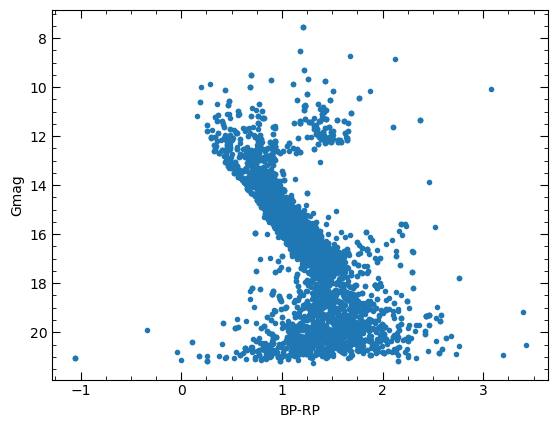

In [100]:
GvsBPRP(data_gaia_6866)

In [101]:
#data_gaia_6866.info

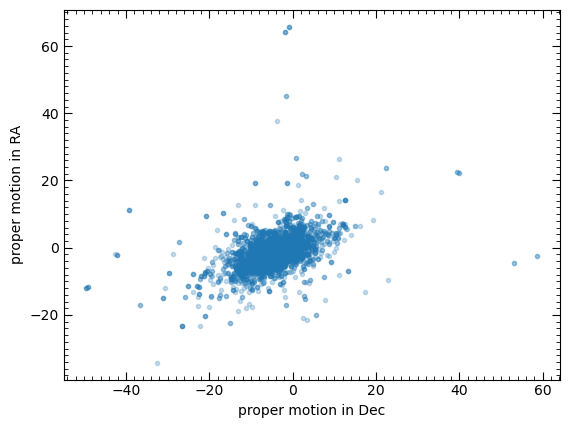

In [102]:
#plot proper motion in Ra vs proper motion in Dec 
fig, ax = plt.subplots()
ax.plot(data_gaia_6866['pmDE'], data_gaia_6866['pmRA'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('proper motion in RA')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(2)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

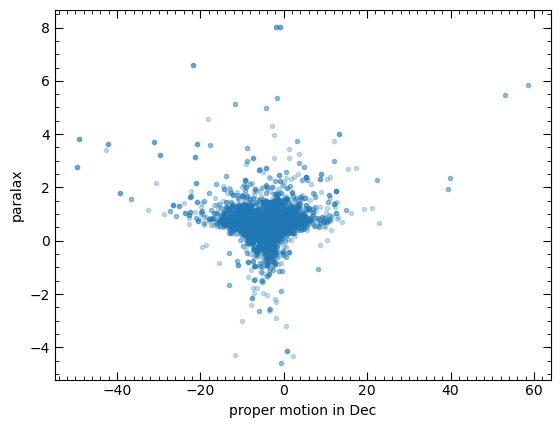

In [103]:
#plot paralax vs proper motion in Dec
fig, ax = plt.subplots()
ax.plot(data_gaia_6866['pmDE'], data_gaia_6866['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

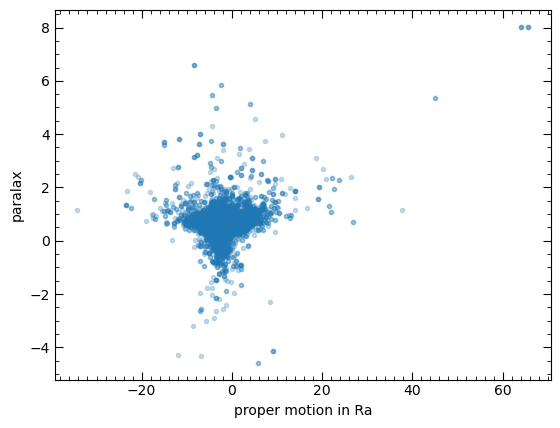

In [104]:
#plot paralax vs proper motion in RA
fig, ax = plt.subplots()
ax.plot(data_gaia_6866['pmRA'], data_gaia_6866['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Ra')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

In [150]:
#importing new data
new_6866 = QTable.read("/users/EllaMathews/Research/rcat_ngc6866_v0.fits")

In [106]:
unimodal_data = Table.read('/users/EllaMathews/Summer-Research/data_for_unimodal_plots_200M.csv')

In [107]:
dataTable = Table()
dataTable['id'] = new_6866['GAIAEDR3_ID']
dataTable['BP'] = new_6866['GAIAEDR3_BP']
dataTable['RP'] = new_6866['GAIAEDR3_RP']
dataTable['G'] = new_6866['GAIAEDR3_G']
dataTable['MemBool'] = new_6866['MemBool']
dataTable['Paralax'] = new_6866['GAIAEDR3_PARALLAX_CORRECTED']
dataTable['Paralax'] = dataTable['Paralax']/1000
dataTable['d'] = 1/dataTable['Paralax']

In [108]:
absmags =[]

for i in range(len(dataTable['d'])):
    if dataTable['d'][i] > 0:
        d10 = dataTable['d'][i]/10
        l = np.log10(d10)
        absmag = dataTable['G'][i] - 5*l
        absmags.append(absmag)
    else:
        absmags.append(0)
dataTable['absmag'] = absmags

In [151]:
#dataTable['Paralax','d','absmag', 'G']

In [110]:
uni_member = join(unimodal_data, dataTable , keys = ['id'])

In [111]:
bprp = dataTable['BP'] - dataTable['RP']
x = bprp
y = dataTable['absmag']

In [112]:
bprp_uni = uni_member['BP'] - uni_member['RP']
x_uni = bprp_uni
y_uni = uni_member['absmag']
P_log = np.log(uni_member['P_median'])
membership = dataTable['MemBool']

Text(0.5, 1.0, 'CMD for NGC6866: Color by log(Period)')

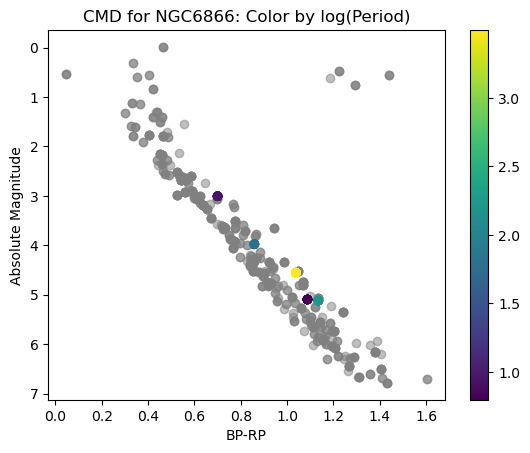

In [113]:
fig, ax = plt.subplots()
plt.scatter(x[membership==1], y[membership==1], c='gray', alpha = .5) #members of cluster
scatter = plt.scatter(x_uni, y_uni, c = P_log)
plt.colorbar(scatter)
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('CMD for NGC6866: Color by log(Period)')

Text(0.5, 1.0, 'CMD for NGC6866: Color by e')

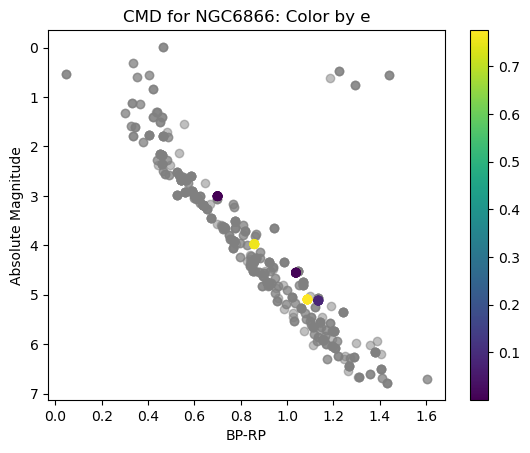

In [114]:
fig, ax = plt.subplots()
plt.scatter(x[membership==1], y[membership==1], c='gray', alpha = .5) #members of cluster
scatter = plt.scatter(x_uni, y_uni, c = uni_member['e_median'])
plt.colorbar(scatter)
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('CMD for NGC6866: Color by e')

Text(0, 0.5, 'G')

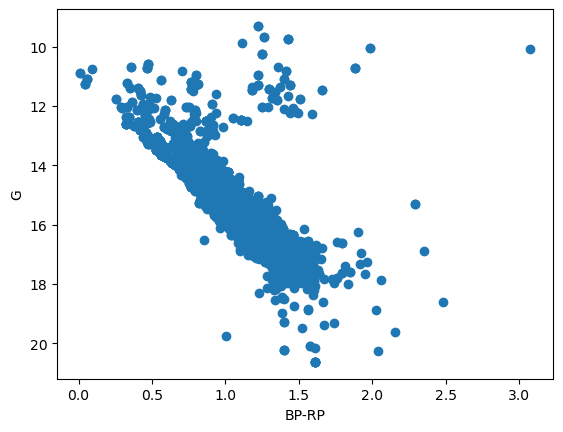

In [115]:
fig, ax = plt.subplots()
x1 = new_6866['GAIAEDR3_BP'] - new_6866['GAIAEDR3_RP']
y1 = new_6866['GAIAEDR3_G']
ax.invert_yaxis()
plt.scatter(x1,y1)
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

In [116]:
membership = new_6866['MemBool']

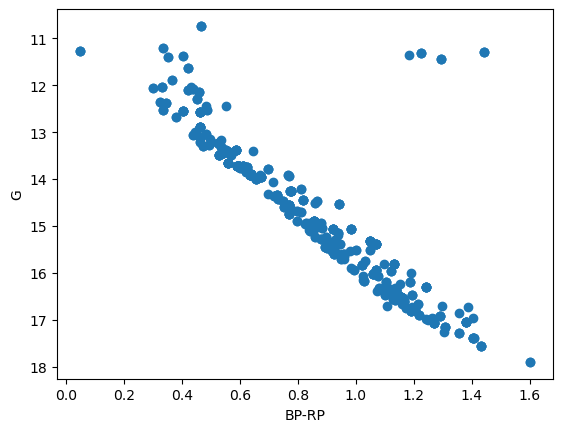

In [117]:
fig, ax = plt.subplots()
x2=x1[membership==1]
y2=y1[membership==1]
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')
plt.scatter(x2,y2)

In [118]:
#new vs old plotting

In [119]:
new_Teff_all = new_6866['Teff']

In [120]:
new_Teff_incluster = new_Teff_all[membership ==1]

In [121]:
new_names_all = new_6866['GAIAEDR3_ID']

In [122]:
new_names_incluster = new_names_all[membership==1]

In [123]:
new_Teff_err_all = new_6866['Teff_err']
new_Teff_err_incluster = new_Teff_err_all[membership==1]

In [124]:
new_logg_all = new_6866['log(g)']
new_logg_incluster = new_logg_all[membership ==1]

In [125]:
new_logg_err_all = new_6866['log(g)_err']
new_logg_err_incluster = new_logg_err_all[membership ==1]

In [126]:
new_feh_all = new_6866['[Fe/H]']
new_feh_err_all = new_6866['[Fe/H]_err']
new_feh_incluster = new_feh_all[membership==1]
new_feh_err_incluster = new_feh_err_all[membership==1]

In [127]:
new_rv_all = new_6866['vrad']
new_rv_err_all = new_6866['vrad_err']
new_rv_incluster = new_rv_all[membership==1]
new_rv_err_incluster = new_rv_err_all[membership==1]

In [128]:
new_obs_date_all = new_6866['DATE-OBS']
new_obs_date_incluster = new_obs_date_all[membership==1]

In [129]:
new_specjitter_all = new_6866['specjitter']
new_specjitter_incluster = new_specjitter_all[membership==1]

In [130]:
new_lsf_all = new_6866['lsf']
new_lsf_incluster = new_lsf_all[membership==1]

In [131]:
new_SNR_all = new_6866['SNR']
new_SNR_incluster = new_SNR_all[membership==1]

In [132]:
new_catalog = Table()

In [133]:
new_catalog['DR3_ID']= new_names_incluster
new_catalog['Teff_new'] = new_Teff_incluster
new_catalog['Teff_err_new'] = new_Teff_err_incluster
new_catalog['logg_new'] = new_logg_incluster
new_catalog['logg_err_new'] = new_logg_err_incluster
new_catalog['[Fe/H]_new'] = new_feh_incluster
new_catalog['[Fe/H]_err_new'] = new_feh_err_incluster
new_catalog['RV_new'] = new_rv_incluster
new_catalog['RV_err_new'] = new_rv_err_incluster
new_catalog['specjitter'] = new_specjitter_incluster
new_catalog['lsf'] = new_lsf_incluster
new_catalog['SNR'] = new_SNR_incluster

In [134]:
old_data = Table()
old_names =[]

In [135]:
for name in combined_table_wantedcolumns['DR3Name']:
    num = np.int64(name[9:])
    old_names.append(num)

In [136]:
old_data['DR3_ID'] = old_names

In [137]:
old_data['Teff_old'] = combined_table_wantedcolumns['teff']

In [138]:
old_data['logg_old'] = combined_table_wantedcolumns['logg']
old_data['logg_err_old'] = combined_table_wantedcolumns['logg_err']

In [139]:
old_data['[Fe/H]_old'] = combined_table_wantedcolumns['feh']
old_data['[Fe/H]_err_old'] = combined_table_wantedcolumns['feh_err']

In [140]:
old_data['RV_old'] = combined_table_wantedcolumns['rv']
old_data['RV_err_old'] = combined_table_wantedcolumns['rve']

In [141]:
old_data['fwhm'] = combined_table_wantedcolumns['fwhm']
old_data['DATE'] = combined_table_wantedcolumns['date']

In [142]:
newdatesreformat = []
for date in new_obs_date_incluster:
    newformat = date[0:4] + date[5:7] + date[8:10]
    newdatesreformat.append(np.int64(newformat))

In [143]:
new_catalog['DATE'] = newdatesreformat

In [144]:
NewVsOld = join(new_catalog, old_data, keys = ['DR3_ID', 'DATE'])

In [145]:
Teff_check = NewVsOld['Teff_new']

Text(0, 0.5, 'New Teff')

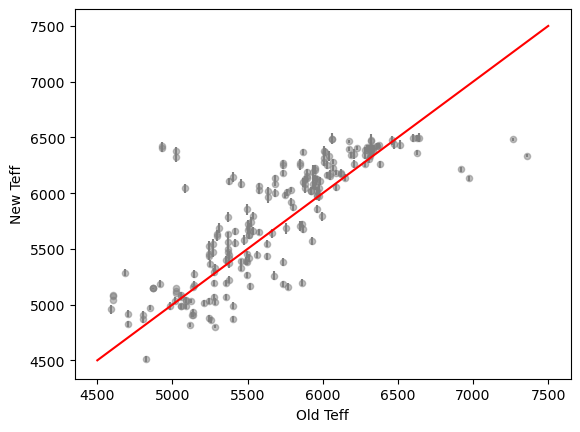

In [146]:
#new vs old Teff
fig, ax = plt.subplots()
x1 = np.linspace(4500, 7500)
ax.plot(x1, x1, 'r')
x = NewVsOld['Teff_old'][Teff_check < 6500]
y = NewVsOld['Teff_new'][Teff_check < 6500]
scatter = plt.scatter(x, y, alpha= 0.5, c = 'gray', s=20)
plt.errorbar(x, y, yerr = NewVsOld['Teff_err_new'][Teff_check < 6500], fmt='none', color = 'gray', zorder = -1)
#plt.colorbar(scatter)
ax.set_xlabel('Old Teff')
ax.set_ylabel('New Teff')

Text(0, 0.5, 'New logg')

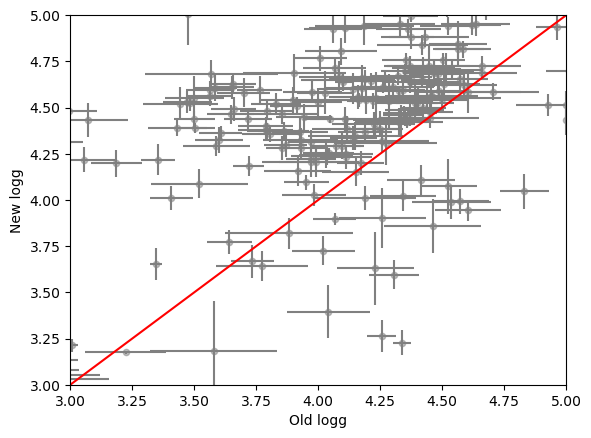

In [147]:
#new vs old logg
fig, ax = plt.subplots()
x1 = np.linspace(3, 5)
ax.plot(x1, x1,'r')
x = NewVsOld['logg_old'][Teff_check < 6500]
y = NewVsOld['logg_new'][Teff_check < 6500]
scatter = plt.scatter(x, y, c = 'gray', s = 20, alpha = 0.5)
plt.errorbar(x, y, yerr=NewVsOld['logg_err_new'][Teff_check < 6500], fmt="none", zorder = -1, color = 'gray')
plt.errorbar(x, y, xerr=NewVsOld['logg_err_old'][Teff_check < 6500], fmt="none", zorder = -1, color = 'gray')
#plt.colorbar(scatter)
ax.set_xlim(3,5)
ax.set_ylim(3,5)
ax.set_xlabel('Old logg')
ax.set_ylabel('New logg')

Text(0, 0.5, 'New Fe/H')

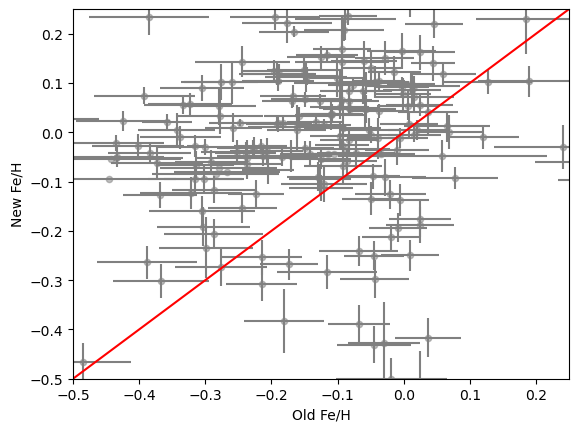

In [148]:
#new vs old Fe/H
fig, ax = plt.subplots()
x1 = np.linspace(-.5, .25)
ax.plot(x1, x1,'r')
x = NewVsOld['[Fe/H]_old'][Teff_check < 6500]
y = NewVsOld['[Fe/H]_new'][Teff_check < 6500]
scatter = plt.scatter(x, y, c = 'gray', alpha = 0.5, s = 20)
plt.errorbar(x, y, yerr=NewVsOld['[Fe/H]_err_new'][Teff_check < 6500], fmt="none", color='gray', zorder= -1)
plt.errorbar(x, y, xerr=NewVsOld['[Fe/H]_err_old'][Teff_check < 6500], fmt="none", color='gray', zorder = -1)
#plt.colorbar(scatter)
ax.set_xlim(-.5,.25)
ax.set_ylim(-.5, .25)
ax.set_xlabel('Old Fe/H')
ax.set_ylabel('New Fe/H')

Text(0, 0.5, 'New RV')

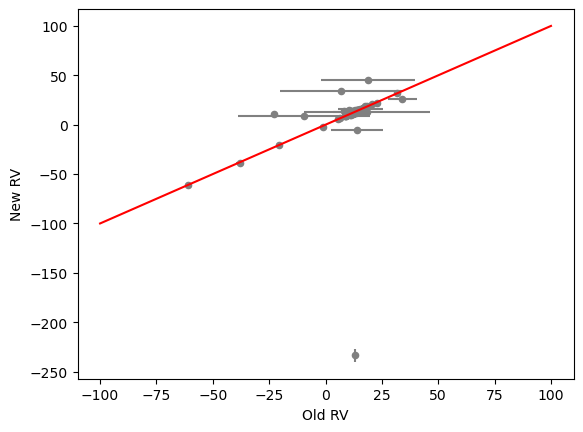

In [149]:
#new vs old RV
fig, ax = plt.subplots()
x1 = np.linspace(-100, 100)
ax.plot(x1, x1,'r')
x = NewVsOld['RV_old'][Teff_check < 6500]
y = NewVsOld['RV_new'][Teff_check < 6500]
scatter = plt.scatter(x, y, c = 'gray', s = 20)
#ax.set_xlim(-50,50)
#ax.set_ylim(-50,50)
plt.errorbar(x, y, yerr=NewVsOld['RV_err_new'][Teff_check < 6500], fmt="none", color='gray', zorder = -1)
plt.errorbar(x, y, xerr=NewVsOld['RV_err_old'][Teff_check < 6500], fmt="none", color='gray', zorder = -1)
#plt.colorbar(scatter)
ax.set_xlabel('Old RV')
ax.set_ylabel('New RV')